In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("Fahrplan", sep = "\t")
data

,Unnamed: 0,Date,TimeHamburgerTreppe,DelayHamburgerTreppe,TimeHansastrasse,DelayHansastrasse,TimeStralsunderstrasse,DelayStralsunderstrasse,TimeGreifswalderstrasse,DelayGreifswalderstrasse,...,TimeZeughausstrasse,DelayZeughausstrasse,TimeBarmenBahnhof,DelayBarmenBahnhof,TimeAlterMarkt,DelayAlterMarkt,TimeLandwehrplatz,DelayLandwehrplatz,TimeLeimbach,DelayLeimbach
0,1840,04/05/20,04:44,0,04:45,0,04:46,0,04:47,0,...,05:16,0,05:22,0,05:26,0,05:27,1,05:32,0
1,1887,04/05/20,05:14,0,05:15,0,05:16,0,05:17,0,...,05:46,1,05:52,NaN,05:56,0,05:57,0,06:02,0
2,1934,04/05/20,05:44,NaN,05:45,0,05:46,0,05:47,0,...,06:16,1,06:22,NaN,06:26,0,06:27,0,06:32,1
3,1981,04/05/20,06:02,0,06:03,0,06:04,0,06:05,1,...,06:42,1,06:47,1,06:52,0,06:53,0,06:59,1
4,2028,04/05/20,06:22,0,06:23,1,06:24,2,06:25,2,...,07:02,0,07:07,0,07:12,NaN,07:13,0,07:19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,1329,24/07/20,18:42,0,18:43,1,18:44,0,18:45,0,...,19:22,0,19:27,0,19:32,0,19:33,0,19:39,1
2158,1376,24/07/20,19:02,0,19:03,1,19:04,1,19:05,1,...,19:42,0,19:47,0,19:52,1,19:53,1,19:59,1
2159,1423,24/07/20,19:22,0,19:23,0,19:24,2,19:25,2,...,20:02,0,20:07,0,20:12,0,20:13,0,20:19,0
2160,1470,24/07/20,19:38,0,19:39,0,19:40,0,19:41,1,...,20:18,0,20:22,0,20:25,0,20:26,0,20:32,0


In [3]:
#Fehlende Werte mit Delay der vorherigen Haltestelle füllen
column_names = list(data)
column_names.remove("Date")
for i in column_names:
    if (not "Delay" in i):
        column_names.remove(i)
for column in column_names:
    if ("Delay" in column):
        data = data[data[column] != "fällt aus"]
        data = data[data[column] != "fÃ¤llt aus"]
        if ("Hamburger" not in column):
            data[column] = pd.to_numeric(data[column]).fillna(pd.to_numeric(data[column_names[column_names.index(column) - 1]]))
        else:
            data[column] = pd.to_numeric(data[column]).fillna(0)            

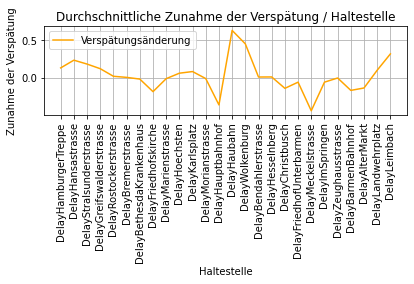

In [4]:
#Für jede Haltestelle Differenz mit Delay vorheriger Haltestelle erstellen
DelaySpawn = []
Haltestelle = []
for column in column_names:
    if ("Delay" in column):
        Haltestelle.append(column)
        if("Hamburger" in column):
            DelaySpawn.append(data[column].mean())
            continue
        data["Difference" + str(column) + str(column_names[column_names.index(column) - 1])] = (pd.to_numeric(data[column]) - pd.to_numeric(data[column_names[column_names.index(column) - 1]]))
        DelaySpawn.append((data["Difference" + str(column) + str(column_names[column_names.index(column) - 1])].mean()))
plt.plot(Haltestelle,DelaySpawn, color = "orange", label = "Verspätungsänderung")
plt.xticks(rotation = "vertical")
plt.grid()
plt.legend(loc = "upper left")
plt.xlabel("Haltestelle")
plt.ylabel("Zunahme der Verspätung")
plt.title("Durchschnittliche Zunahme der Verspätung / Haltestelle")
plt.tight_layout()
# plt.savefig("Durchschnittliche Zunahme der Verspätung", dpi = 200)